In [12]:
# import lithosphere_prior
import sys
sys.path.append('../lithosphere_prior')
from lithosphere_prior_new import LithospherePrior

# Import rest
from sdss_stochastic import SDSS_stochastic
import utility as sds_util
import plot as sds_plt

import mikkel_tools.utility as mt_util

import numpy as np
import matplotlib.pyplot as plt

In [4]:
LP = LithospherePrior(sat_height = 350)
LP.grid_even_spaced(grid_size=3.0)

grid_in = np.hstack((90-LP.grid_even_theta, LP.grid_even_phi))
print(LP)


______current attributes______

class_abs_path:      ../lithosphere_prior
a:                   6371.2
r_sat:               6721.2
r_cmb:               3480.0
rad:                 0.017453292519943295
mu0:                 1.2566370614359172
N_ensemble:          1
rf_method:           not_sum
rf_coeff:            3
rf_corr:             0.001
rf_gamma:            100000.0
rf_init_flag:        False
grid_even_theta_len: 60
grid_even_phi_len:   120
grid_even_theta:     (7200, 1), Max/Min: 178.50 / 1.50
grid_even_phi:       (7200, 1), Max/Min: 178.50 / -178.50
grid_even_radial:    (7200, 1), Max/Min: 6371.20 / 6371.20



In [ ]:
sph_d_list = list()

for i in np.arange(0,259200):
    for j in np.arange(0,259200):
        sph_d_list.append(sds_util.haversine(LP.a, LP.grid_even_phi[i,[0]], LP.grid_even_theta[i,[0]], LP.grid_even_phi[j,[0]], LP.grid_even_theta[j,[0]]))


In [16]:
# CORE GRID
core = SDSS_stochastic(sim_type = "core")
core.grid(core.r_cmb, grid_in, calc_sph_d = True)
#core.grid(core.a, "gauss_leg", calc_sph_d = True)
core.data()
#core.condtab()
#core.semivar(model_lags = 'all', model = "exponential", max_dist = 4500, lag_length = 50, zero_nugget = True)
print(core)


______current attributes______

a:                6371.2
r_cmb:            3480.0
r_sat:            6721.2
rad:              0.017453292519943295
mu0:              1.2566370614359172
N_grid:           7200
N_SH:             60
sim_type:         core
r_grid:           3480.0
grid:             (7200, 2)
sph_d:            (7200, 7200)
lon:              (7200,), Max/Min: 88.50 / -88.50
lat:              (7200,), Max/Min: 178.50 / -178.50
data:             (7200,), Max/Min: 4926300.28 / -2739557.23
r_grid_repeat:    (7200,), Max/Min: 3480.00 / 3480.00
target_var:       375993962807.5768
target_mean:      0.0



In [17]:
print(core.lon)
print(core.lat)

[ 88.5  88.5  88.5 ... -88.5 -88.5 -88.5]
[-178.5 -175.5 -172.5 ...  172.5  175.5  178.5]


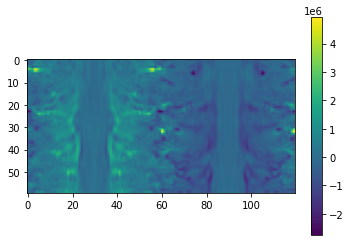

In [22]:
plt.figure()
plt.imshow(core.data.reshape(60,120))
plt.colorbar()

In [3]:
# SAT GRID
sat = SDSS_stochastic(sim_type = "sat", N_grid = 3010)
sat.grid(sat.r_sat, "equal_area", calc_sph_d = False)
sat.data()
print(sat)


______current attributes______

a:                6371.2
r_cmb:            3480.0
r_sat:            6721.2
rad:              0.017453292519943295
mu0:              1.2566370614359172
N_grid:           3008
N_SH:             60
sim_type:         sat
r_grid:           6721.2
grid_type:        equal_area
sph_d:            None
lon:              (3008,), Max/Min: 359.85 / 0.27
lat:              (3008,), Max/Min: 86.00 / -86.00
n_regions:        (1, 47)
s_cap:            (1, 47)
data:             (3008,), Max/Min: 90095.01 / -88243.84
r_grid_repeat:    (3008,), Max/Min: 6721.20 / 6721.20



In [4]:
#%% PLOT GRID
sds_util.plot_cartopy_global(core.lat, core.lon, cmap = 'PuOr_r', title="Prior radial core information")

<Figure size 800x800 with 2 Axes>

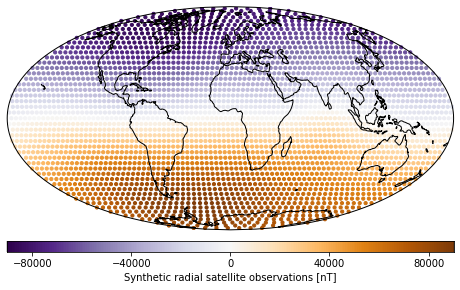

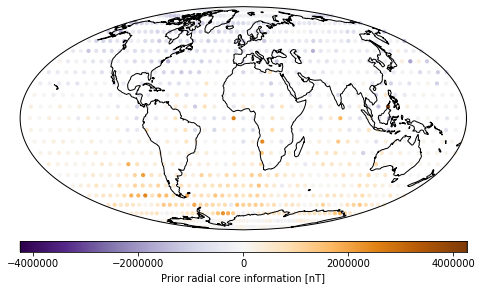

In [5]:
#%% PLOT SYNTHETIC DATA
sds_util.plot_cartopy_global(sat.lat, sat.lon, data=sat.data, cmap = 'PuOr_r', title="Synthetic radial satellite observations", scale_uneven = False)
sds_util.plot_cartopy_global(core.lat, core.lon, data=core.data, cmap = 'PuOr_r', title="Prior radial core information", scale_uneven = False)

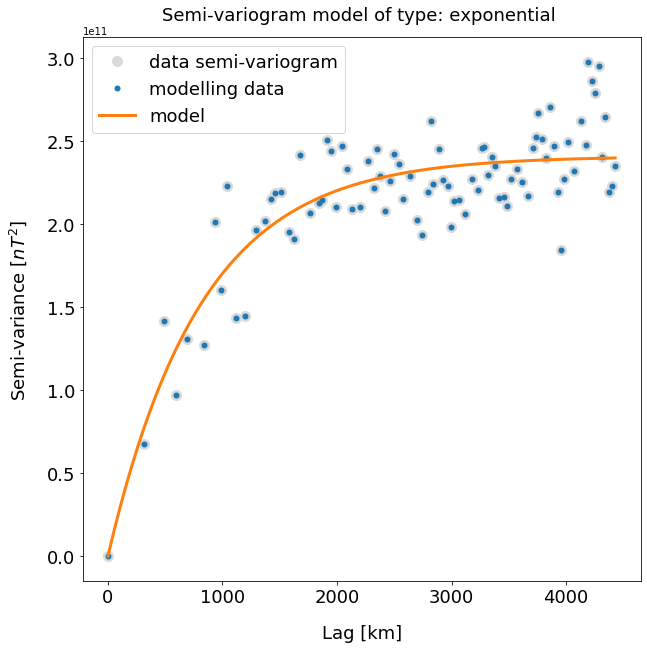

In [6]:
#%% PLOT SEMI-VARIOGRAM
semivar = sdssim_semivar = {"semi-variogram LUT":core.sv_lut, "total data lags":core.lags, "total data sv":core.pics, "model data lags":core.lags_model, "model data sv":core.pics_model, "model names":core.model_names, "sv model y":core.sv_curve, "sv model x":core.lags_sv_curve, "sv model":core.model, "a":core.a, "C0":core.C0, "C1":core.C1, "C2":core.C2, "C3":core.C3, "n_lags":core.n_lags, "max_cloud":core.max_cloud, "sph_d_sorted":core.sph_d_sorted, "sort_d":core.sort_d}
sds_plt.plots('model_semi_variogram_new', semivar)